##Instructions




1. For every data visualization you make, add a proper description on the axes. Even if the variable name isn't terrible, explicitly add them. This is worth 1 point per axis per problem!
2. For each question asking you to make a calculation, you must add a comment or a markdown cell explicitly answering the question. **Python output alone is insufficient.**

## 0. Load Stuff

Load the `pandas`, `matplotib`,`seaborn`, and `geopandas`libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

In [ ]:
voters.head(10)

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
5,Arizona,2020,Feb,50853
6,Arizona,2020,Mar,31872
7,Arizona,2020,Apr,10249
8,California,2016,Jan,87574
9,California,2016,Feb,103377


##Introduction (10 points)
You've been hired to work with a government organization interested in formation about voter registration in the United States. They have asked you to come up with two research questions--one about national trends and one about a state trend of your choice.

Clearly state:
* the purpose of your project
* what the goal is
* why it is important for someone to read this notebook?

In additon, state your two research questions

* Question 1:
* Question 2:



In [ ]:
#The prupose of my project is to extract insights about voters, by state in the United States. The goal is to answer the two questions below. It is important that someone read
#this notebook because understanding these past demographics can help us understand and interpret current voter trends. By comparing the 2024 election to the insights found in this
#notebook, we can better understand the 2024 and future elections.

#Question 1: Based on our data, which state had the most influence in these elections?
#Question 2: How has the number of registered voters in the U.S. changed between 2016 and 2020?

## 1. Data Processing (8 points)

Show the first five rows of data and explain what the variable names are. (5 points)

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


Check for any missing data data. (1 point)

In [ ]:
voters.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


Check your data types. (1 point)

Rename the jurisdiction column to "NAME" and the "New registered voters" to "registered_voters" to use througout the notebook. (2 points)

In [ ]:
voters = voters.rename(columns={"Jurisdiction":"NAME", "New registered voters": "registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467


Explain any potential limitations to your data (2 points)

In [ ]:
#First, the number of variables is small, limiting the amount of meaningful insights that can be extracted. Additionally, the number of observations is also small. This is an issue
#because this limits the representation of the data, and therefore limits how much we can generalize our insights. Are our insights really meaningful with such limited data?

#Additionally, only a select few states are represented in this dataset. Again, this will make it hard to generalize any conclusions drawn.

###Exploratory Data Analysis (20 points, as noted)

When was the highest amount of new voter registration? Show the state, month, year, and number of registered voters. (5 points)



In [ ]:
max_voters = voters["registered_voters"].max()
print(max_voters)
new = voters[(voters["registered_voters"] == 238281)]
new

#The highest number of new voter registration was in February of 2020, in California

238281


,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


What is the average voter registration? (1 points)

In [ ]:
voters["registered_voters"].mean()

#The mean average voter registration was 48,223 new people

48223.46226415094

Create a dataframe called "high_voters" showing only the times where voter registration was higher than your above average. How many times did this happen? (3 points)


In [ ]:
high_voters = voters[(voters["registered_voters"] > 48223.46226415094)]
#high_voters.info() #this has occurred 36 times
print(high_voters)

              NAME  Year Month  registered_voters
1          Arizona  2016   Feb              51155
2          Arizona  2016   Mar              48614
5          Arizona  2020   Feb              50853
8       California  2016   Jan              87574
9       California  2016   Feb             103377
10      California  2016   Mar             174278
11      California  2016   Apr             185478
12      California  2020   Jan             151595
13      California  2020   Feb             238281
14      California  2020   Mar             176810
42         Florida  2016   Jan              50231
43         Florida  2016   Feb              87351
44         Florida  2016   Mar              73627
45         Florida  2016   Apr              52508
46         Florida  2020   Jan              77466
47         Florida  2020   Feb             109859
48         Florida  2020   Mar              54872
55         Georgia  2020   Feb              55386
59        Illinois  2016   Feb              99674


How many times did each state go above the national average for new voter registration? (2 points)



In [ ]:
high_voters.value_counts("NAME")
#Texas -> 8 times
#Cali -> 7 times
#Florida -> 7 times
#NC -> 6 times
#Illinois -> 4 times
#Arizona -> 3 times
#Georgia -> 1 time

,count
NAME,
Texas,8
California,7
Florida,7
North Carolina,6
Illinois,4
Arizona,3
Georgia,1


Which three states had the highest average voter registration overall? Show only the top three results. (5 points)

In [ ]:
grouped_voters_state = voters.groupby("NAME")
grouped_voters_state_mean = grouped_voters_state["registered_voters"].mean()
grouped_voters_state_mean_sorted = grouped_voters_state_mean.sort_values()
grouped_voters_state_mean_sorted.tail(3)

#Therefore Florida, Texas and California had the highest average voter registration.

,registered_voters
NAME,
Florida,65868.125
Texas,114610.100
California,144545.375


##Data Visualization (30 points, as marked)

Create a plot showing the voter registratation by state.
* A dataframe/a way to show the total voters registered per state. If you create a new dataframe, you may need to include `reset_index()`.(3 points)
* A figure size of 10,10 (1 point)
* Clearly legible labels and titles (2 points)
* A color palette that is not the default palette (1 point)
* Comment on the trends you see (2 points)


(9 points total)

In [ ]:
grouped_voters_state_total = grouped_voters_state["registered_voters"].sum()
grouped_voters_state_total = grouped_voters_state_total.to_frame()
grouped_voters_state_total

,registered_voters
NAME,
Arizona,282492
California,1156363
Colorado,164220
Delaware,25331
District of Columbia,32484
Florida,526945
Georgia,292833
Illinois,454723
Maryland,221335


<ipython-input-77-700d3f8594da>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='NAME', y='registered_voters', data=grouped_voters_state_total, palette = "pastel")


<Figure size 1000x1000 with 0 Axes>

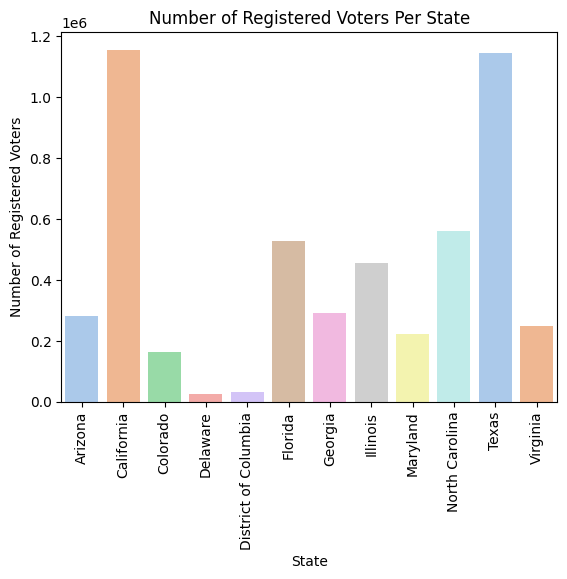

<Figure size 1000x1000 with 0 Axes>

In [ ]:
sns.barplot(x='NAME', y='registered_voters', data=grouped_voters_state_total, palette = "pastel")
plt.title("Number of Registered Voters Per State")
plt.xlabel("State")
plt.ylabel("Number of Registered Voters")
plt.xticks(rotation = 90)
plt.figure(figsize = (10, 10))

#This plot shows the number of registered voters per state. We can see that California and Texas have the most registered voters by state. This is probably because California and Texas
#are large states by area. We also see that Deleware and Washington D.C. have the smallest amount of registered voters, probably because they are very small in area

Produce a plot comparing voter registation in 2016 and 2020. (2 pts)
* Color the graph based on the month.(1 pt)
* Change the default color palette used. (1 pt)
* Comment on any trends you see. (2 pts)
* Add the appropriate labels and title (1)
* Comment on any trends you see (2 points)

(9 pts total)

<ipython-input-78-b9d05d8ce033>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Year", y = "registered_voters", data = voters_year, palette = "viridis")


<Figure size 1000x1000 with 0 Axes>

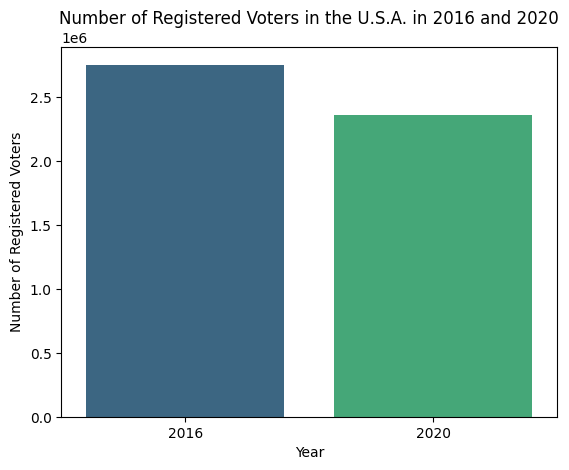

<Figure size 1000x1000 with 0 Axes>

In [ ]:
voters_year = voters.groupby("Year")["registered_voters"].sum().reset_index()
sns.barplot(x = "Year", y = "registered_voters", data = voters_year, palette = "viridis")
plt.xlabel("Year")
plt.ylabel("Number of Registered Voters")
plt.title("Number of Registered Voters in the U.S.A. in 2016 and 2020")
plt.figure(figsize = (10, 10))

#The number of registered voters in 2020 was less than the number of registered voters in 2016. There was approximately a 3e6 person decrease.

Create a data visualization that relates to either your state level research question or your national level reserach question. If one of your questions was answered by the above graphs, you may not use that question. (12 points)

<Axes: title={'center': 'Change in Number of People Registered per State from 2016 to 2020'}, xlabel='State', ylabel='Difference in Registered Voters from 2016 to 2020'>

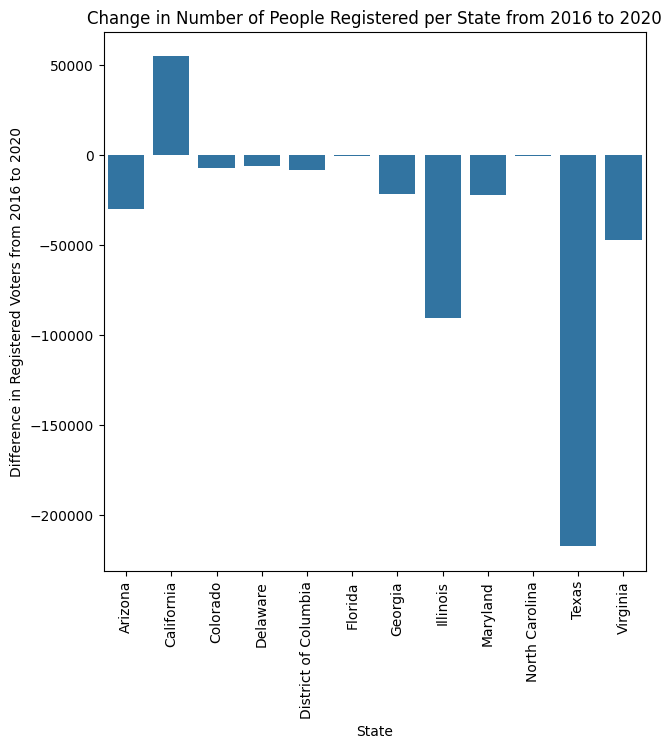

In [ ]:
agg = voters.groupby(['NAME', 'Year'])['registered_voters'].sum().reset_index()
pivot_df = agg.pivot(index = 'NAME', columns = 'Year', values = 'registered_voters').reset_index()

pivot_df['difference'] = pivot_df[2020] - pivot_df[2016]

plt.figure(figsize=(7, 7))
plt.xticks(rotation = 90)
plt.ylabel("Difference in Registered Voters from 2016 to 2020")
plt.xlabel("State")
plt.title("Change in Number of People Registered per State from 2016 to 2020")
sns.barplot(x = 'NAME', y = 'difference', data=pivot_df)

##Mapping (14 points as noted)

Load in our shape file data from the mapping unit.

In [ ]:
!git clone https://github.com/SFord87/325-Datasets

Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 9.65 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

'/content/325-Datasets/cb_2018_us_state_500k.shp'

In [ ]:
states = gpd.read_file(shapefile)
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.8677 29.86155, -88.86566 2..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


Set our continental US bounding box to us for the next questions. (2 points)

In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358
bbox = states.cx[minx:maxx, miny:maxy]

Create a dataframe that shows the average voter registration per state. (2 points)

In [ ]:
grouped_voters_state_mean_sorted

,registered_voters
NAME,
Delaware,3166.375
District of Columbia,3248.400
Colorado,20527.500
Maryland,22133.500
Virginia,24845.200
Arizona,35311.500
Georgia,36604.125
North Carolina,56040.800
Illinois,56840.375


Merge the above dataframe results with the mapping data. You will want to use `inner` for the `how` argument. (2 points)

In [ ]:
ermmm_idk = grouped_voters_state_mean_sorted_df.merge(states, on='NAME', how='inner')
ermmm_idk.head()

,NAME,registered_voters,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,Delaware,3166.375,10,01779781,0400000US10,10,DE,00,5045925646,1399985648,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ..."
1,District of Columbia,3248.400,11,01702382,0400000US11,11,DC,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940..."
2,Colorado,20527.500,08,01779779,0400000US08,08,CO,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7..."
3,Maryland,22133.500,24,01714934,0400000US24,24,MD,00,25151100280,6979966958,"MULTIPOLYGON (((-76.05015 37.9869, -76.04998 3..."
4,Virginia,24845.200,51,01779803,0400000US51,51,VA,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."


In [ ]:
grouped_voters_state_mean_sorted_df = grouped_voters_state_mean_sorted.to_frame()
geo_grouped_voters_state_mean_sorted_df = gpd.GeoDataFrame(ermmm_idk, geometry='geometry')

Make a map featuring the following

*  a figure size of 25, 15 (1 point)
*  A boundary map of the continental US data, with a black linewidth of .25 (2 points)
*  The states that we have the voter registration information for highlighted in a color map of your choice. (3 points)
*  A legend and a title. (2 points)

*Bonus point: add the state abbrevations and average number of registered voters to the map* (1 point)

(8 points total)

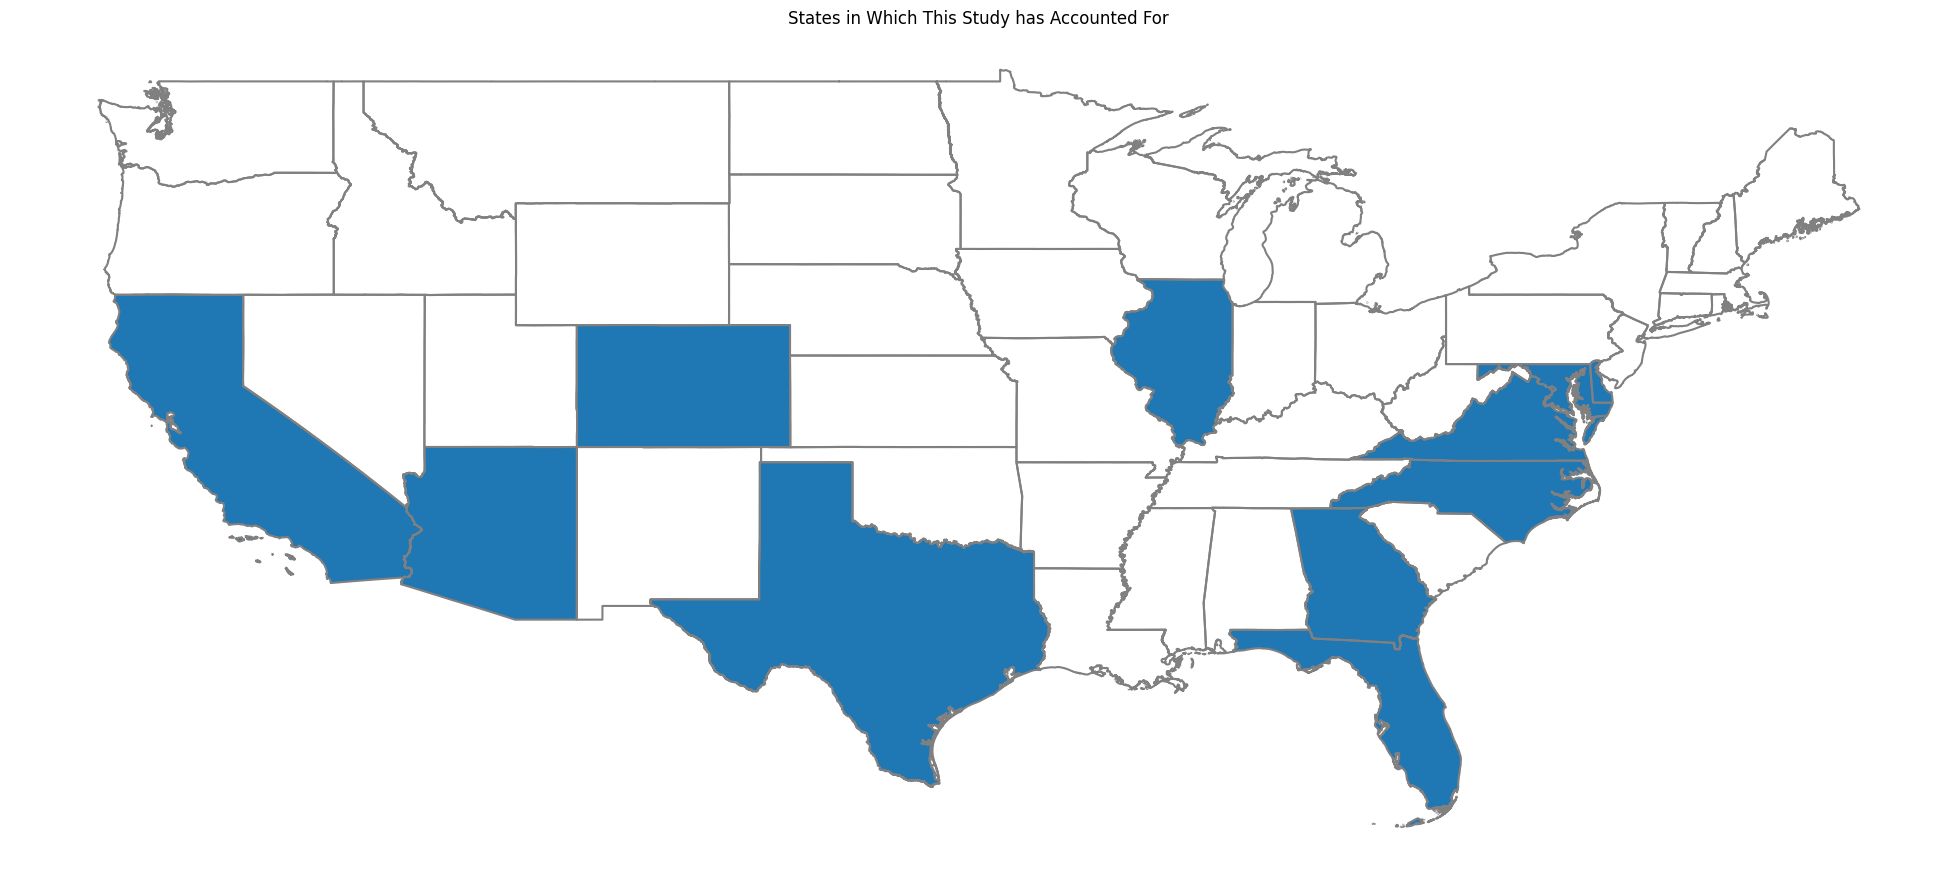

In [ ]:
us_map=bbox.boundary.plot(figsize=(25,15),color="gray")
geo_grouped_voters_state_mean_sorted_df.plot(ax=us_map, linewidth=0.25, edgecolor='black', legend=True)
us_map.axis("off")
plt.title("States in Which This Study has Accounted For")
plt.show()

##Conclusion  (15 points)

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


In [ ]:
# In the data processing section, we extracted several insights. First, the most amount of registered voters occured in California in February of 2020. This makes logical sense, as
# the presidential election campaigning period typically starts in January. The average registered voter count was 48,223. California exceed this average multiple times, with the
# its greatest count, and the largest in the whole dataset, being 238,281. These findings support the idea that California plays a big role in U.S. elections

# The visualization section showed that California and Texas, by far, had the most registered voters. This was unsurprising, as these two states also have the largest area by square
# foot of all the states in the dataset. We saw that in 2020, there were less registered voters in the United States than in 2016. However, despite this decrease, California was the
# only state in our datatset to have an increase in registered voters from 2016 to 2020. Again, this supports the claim that of all the states in our dataset, California plays the
# largest role in elections

# I would suggest that my client targets California for the remainder of their research. This state consistently has high voter registration counts, exceeds the national average in
# the number of registered voters and has been seeing an upward trend in registered voters, when all of our other states have seen a downward trend. Clearly, California is
# doing something right, and it could be a good idea to investigate what California's practices when it comes to convincing its residents to register to vote. It might also be a good
# idea to investigate other states that are similar to California in political views ie New York and Massachusetts.

# My next step would be to get my hands on the data of more states, more years and more months. Data on more states can help us generalize our conclusions to the entire United States.
# Data on more months could allow us to view trends leading up to the election. Data on more years would allow us to view trends across several election cycles. All of these
# additions would allow us to draw more cohesive, generalized and useful insights.

##Github (3 points)
Post this to your Github and include the accessible link either here or on brightspace.

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.